# Análisis numérico

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Leer el conjunto de datos

In [2]:
data = pd.read_csv('Data/train.csv')
data.head(4)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Reconocimiento de tipo de datos

In [3]:
data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [4]:
# Convertir los tipos de datos a cadenas para evitar problemas de comparación
dtypes_grouped = data.columns.to_series().groupby(data.dtypes.apply(str)).apply(list)
group_keys = dtypes_grouped.keys()

# Imprimir la cantidad de columnas por tipo de dato
for key in group_keys:
    print(f'El tipo de dato {key} tiene un total de {len(dtypes_grouped[key])} variables')

El tipo de dato float64 tiene un total de 65 variables
El tipo de dato int64 tiene un total de 41 variables
El tipo de dato object tiene un total de 16 variables


In [5]:
# Crear un diccionario para almacenar las variables y su cantidad de valores únicos
leng_dict = {}

for var in data.columns:
    if len(data[var].unique()) < 15:
        leng_dict[var] = len(data[var].unique())

# Convertir el diccionario en un DataFrame
leng_df = pd.DataFrame(list(leng_dict.items()), columns=['Variable', 'Unique_Count'])

# Ordenar el DataFrame de manera descendente por 'Unique_Count'
leng_df_sorted = leng_df.sort_values(by='Unique_Count', ascending=False)

# Mostrar el DataFrame ordenado
leng_df_sorted.head(4)

,Variable,Unique_Count
54,AMT_REQ_CREDIT_BUREAU_QRT,12
29,DEF_30_CNT_SOCIAL_CIRCLE,11
53,AMT_REQ_CREDIT_BUREAU_WEEK,10
52,AMT_REQ_CREDIT_BUREAU_DAY,10


## Cambio de tipo de datos

Acá decidimos convertir el tipo de datos a `category` para las variables que eran `object` o directamente tenian menos de 12 valores únicos.

In [6]:
for var in data.columns:
    if len(data[var].unique()) <= 12:
        data[var] = data[var].astype('category')
    elif data[var].dtypes == 'object':
        data[var] = data[var].astype('category')
    elif var in ["CNT_CHILDREN","CNT_FAM_MEMBERS"]:
        data[var] = data[var].astype('category')
    else:
        data[var] = data[var].astype('float64')


Agrupamos por las variables por tipo de dato para determinar cuántas variables numéricas y categóricas hay en el conjunto de datos.

In [7]:
# Convertir los tipos de datos a cadenas para evitar problemas de comparación
dtypes_grouped = data.columns.to_series().groupby(data.dtypes.apply(str)).apply(list)
group_keys = dtypes_grouped.keys()

# Imprimir la cantidad de columnas por tipo de dato
for key in group_keys:
    print(f'El tipo de dato {key} tiene un total de {len(dtypes_grouped[key])} variables')


El tipo de dato category tiene un total de 59 variables
El tipo de dato float64 tiene un total de 63 variables


In [8]:
numeric_cols = dtypes_grouped[group_keys[1]]
len(numeric_cols)

63

In [9]:
data.shape

(307511, 122)

## Detección de valores faltantes

En este caso identificamos varios casos de porcentajes de valores faltantes en el conjunto de datos, considerando que hay un total de `307.511` registros, tomamos una acción diferente para cada caso.

In [10]:
# Calcular el porcentaje de valores faltantes para cada columna
missing_percentage = data[numeric_cols].isnull().sum() / data[numeric_cols].shape[0] * 100
missing_percentage

SK_ID_CURR                     0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
                                ...    
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 63, dtype: float64

Así mismo tenemos en cuenta que de las 63 variables numéricas, el **25%** de las variables poseen a lo sumo un **13%** de valores faltantes, por el contrario, existe la alta proporción de variables con porcentajes de valores faltantes superiores al **20%**.

In [11]:
missing_percentage.describe()

count    63.000000
mean     42.429629
std      26.447872
min       0.000000
25%      13.501631
50%      50.749729
75%      62.683774
max      69.872297
dtype: float64

## Caso 1:

Para la eliminación de valores faltantes consideramos un umbral de **20%**, del cual para el `caso 1` identificamos que existe un total de 45 variables que superan este umbral, por lo cual consideramos eliminar estas variables debido a que un método de imputación no resultaría tan eficiente debido a la escasa información que se presentan en ellas.

In [12]:
# Filtrar las columnas con más del 10% de valores faltantes
columns_with_high_missing = missing_percentage[missing_percentage > 20]

# Nombre de las columnas a eliminar
del_cols = columns_with_high_missing.index

print(f'''Hay un total de {len(columns_with_high_missing)} variables con porcentaje de valores faltantes mayor a 20%''')

Hay un total de 45 variables con porcentaje de valores faltantes mayor a 20%


Por lo cual nuestras variables numéricas que mantendremos serán las listadas a continuación y son un total de 17 variables.

In [13]:
# Actualizar la lista numeric_cols eliminando las columnas eliminadas
numeric_cols = [col for col in numeric_cols if col not in del_cols]
numeric_cols.remove('SK_ID_CURR') # Esta es el ID único
numeric_cols

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [14]:
data[numeric_cols].shape

(307511, 17)

## Caso 2:

Para este caso consideramos las variables que poseen menos del **20%** de valores faltantes y procedemos a aplicar imputación con la mediana sobre estos valores faltantes.

**Nota:** En principio la intención era imputar con la KNN, pero el computo no dio y se morian o no finalizaban los procesos. KNN era para cuasi conservar la distribución de los datos, a diferencia de imputación con la mediana que no conserva la distribución en los mismos.

In [15]:
data[numeric_cols].isnull().sum()/data[numeric_cols].shape[0]*100

AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
HOUR_APPR_PROCESS_START        0.000000
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

Realizando la imputación con la mediana.

In [16]:
from sklearn.impute import SimpleImputer

# Crear una instancia del imputador de la mediana
median_imputer = SimpleImputer(strategy='median')

# Imputar los valores faltantes en las columnas numéricas
data_imputed = data[numeric_cols].copy()  # Copiar las columnas numéricas

# Aplicar la imputación
data_imputed = median_imputer.fit_transform(data_imputed)

# Convertir el resultado a DataFrame con las columnas originales
data_imputed = pd.DataFrame(data_imputed, columns=numeric_cols)

# Si quieres reflejar los cambios en el DataFrame original
data[numeric_cols] = data_imputed

# Verificar los primeros registros después de la imputación
data[numeric_cols].head(4)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,10.0,0.262949,0.139376,2.0,2.0,-1134.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,11.0,0.622246,0.535276,1.0,1.0,-828.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,9.0,0.555912,0.729567,0.0,0.0,-815.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,17.0,0.650442,0.535276,2.0,2.0,-617.0,0.0,1.0


Verificando que no hayan datos nulos.

In [18]:
data[numeric_cols].isnull().sum()

AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
HOUR_APPR_PROCESS_START       0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
OBS_30_CNT_SOCIAL_CIRCLE      0
OBS_60_CNT_SOCIAL_CIRCLE      0
DAYS_LAST_PHONE_CHANGE        0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

## Análisis univariado

### Pruebas de normalidad

Realizamos la prueba de normalidad de Shapiro Wilk, para ello importamos la librería a utilizar.

In [19]:
from scipy.stats import shapiro

Pese a que en la fase de visualización de las distribuciones de cada variable pudimos evidenciar la no-normalidad de las mismas, decidimos realizar la prueba de normalidad por protocolo. También reconocemos que la esta prueba de normalidad suele ser útil en conjunto de datos pequeños, y por lo cual podría no ser eficaz en este caso, decidimos implementarla más que todo por lo que ya sabiamos *(por las visualizaciones)* que no son normales.

In [20]:
# Crear una lista para almacenar los resultados
results = []

# Iterar sobre cada columna numérica
for col in numeric_cols:
    # Realizar la prueba de normalidad Shapiro-Wilk
    _, p_value = shapiro(data[col])
    
    # Determinar si es normal o no
    normality = "Normal" if p_value >= 0.05 else "-"
    
    # Agregar el resultado a la lista
    results.append({'Variable': col, 'Normalidad': normality})

# Convertir la lista de resultados a un DataFrame
normality_results = pd.DataFrame(results)

normality_results.head(4)

/home/sebastian/miniconda3/envs/transmilenio/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 307511.
  res = hypotest_fun_out(*samples, **kwds)


,Variable,Normalidad
0,AMT_INCOME_TOTAL,-
1,AMT_CREDIT,-
2,AMT_ANNUITY,-
3,AMT_GOODS_PRICE,-


Cómo podemos ver ninguna variable es reconocida como normal, bajo la prueba de Skapiro Wilk, la celda de abajo muestra las variables que mediante el P-Valor de Shapiro Wilk, deberían ser normales.

In [21]:
normality_results[normality_results["Normalidad"] != '-']

,Variable,Normalidad


### Visualización

Ahora empezaremos a visualizar las distribuciones de las variables numéricas para poder realizar un análisis descriptivo sobre las mismas.

#### Sobre cliente

En primera instancia vamos a considerar la información que corresponde al cliente, decriptores como cuántos hijos tiene, cuánto gana, etc. Variables que describen al cliente.

En el caso de la información del score *(asumimos que crediticio)* proveniente de tres (3) centrales de riesgo diferentes, aunque la central número uno (1) fue eliminada debido a la alta presencia de valores faltantes, de ello podemos obsevar lo siguiente:

* La segunda y tercera central reporta una mayor concentración de clientes con un score entre el **50%** y **80%**, lo cual nos indica un buen perfil crediticio del cliente.

* El **50%** por ciento de lo clientes cuenta con un salario *(no se especifíca si anual; suponemos que si)* entre **\$112.500** **\$202.500**, aunque se evidencia la presencia de clientes que cuentan con un sueldo superior a este rango, quizá tenga relación con los clientes que tienen puestos laborales de mayor paga.

**Nota:** Toca tener en cuenta que este score, según el diccionario de datos está normalizado, por lo cual la inferencia que se realizó sobre estas variables podría estar sujeta a sesgos.

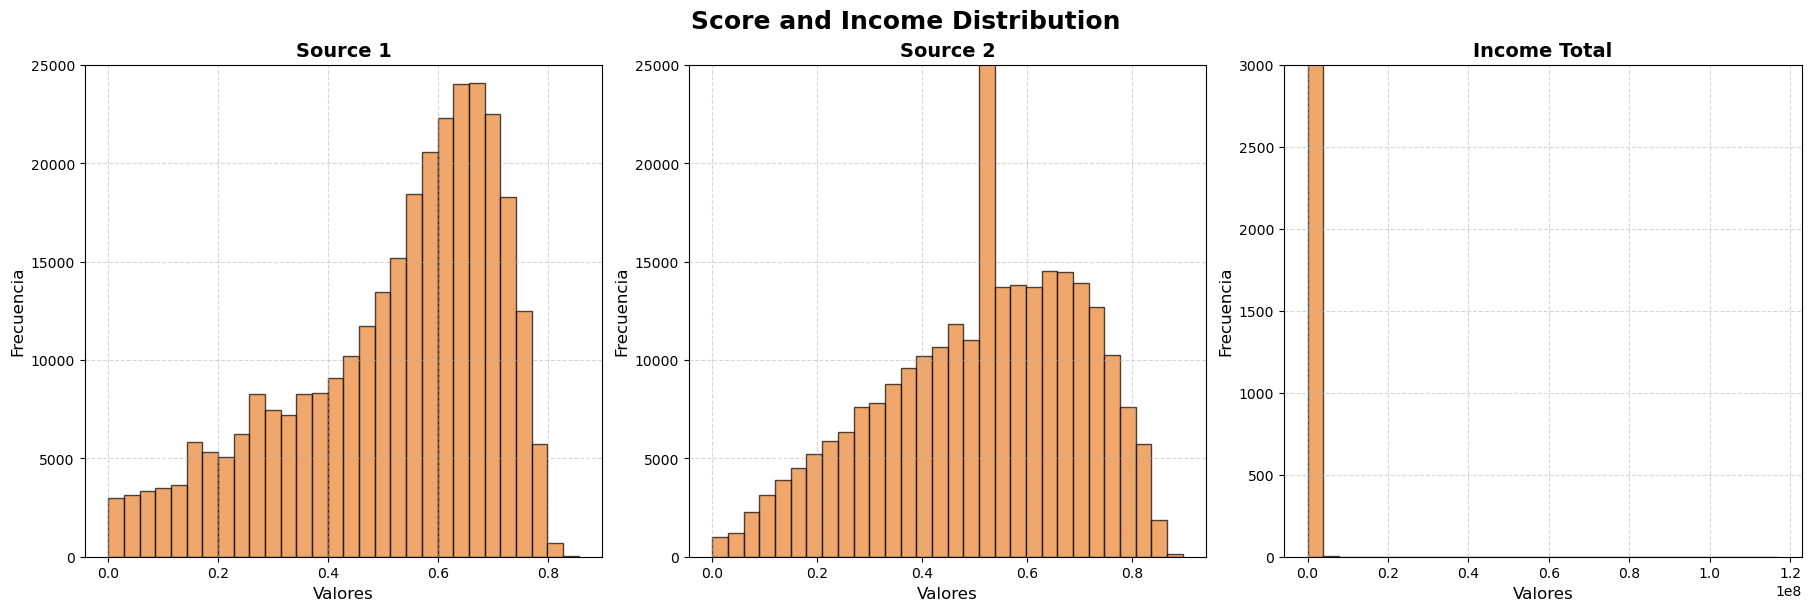

In [31]:
# Lista de variables a graficar
variables = ["EXT_SOURCE_2", "EXT_SOURCE_3", "AMT_INCOME_TOTAL"]

# Crear figura y ejes (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Ajustar el suptítulo
fig.suptitle('Score and Income Distribution', fontsize=18, fontweight='bold')

# Iterar sobre cada variable y su respectivo eje
for ax, var, i in zip(axes, variables, range(1, 4)):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"Source {i}" if i <= 2 else "Income Total", fontsize=14, fontweight="bold")  # Título personalizado
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.set_ylim(0, 25000) if i <= 2 else ax.set_ylim(0, 3000)  # Establecer límites en el eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()

In [32]:
data[variables].describe()

,EXT_SOURCE_2,EXT_SOURCE_3,AMT_INCOME_TOTAL
count,3.075110e+05,307511.000000,3.075110e+05
mean,5.145034e-01,0.515695,1.687979e+05
std,1.908699e-01,0.174736,2.371231e+05
min,8.173617e-08,0.000527,2.565000e+04
25%,3.929737e-01,0.417100,1.125000e+05
50%,5.659614e-01,0.535276,1.471500e+05
75%,6.634218e-01,0.636376,2.025000e+05
max,8.549997e-01,0.896010,1.170000e+08


* Considerando la información proporcionada por el diccionario de datos, es posible afirmar que el **50%** de los clientes habita en una región con indice de población.

* De igual forma se evidencia que la mitad de los clientes no cambian de celular por al menos **2 años** al momento de solicitar el préstamo a la entidad bancaria.

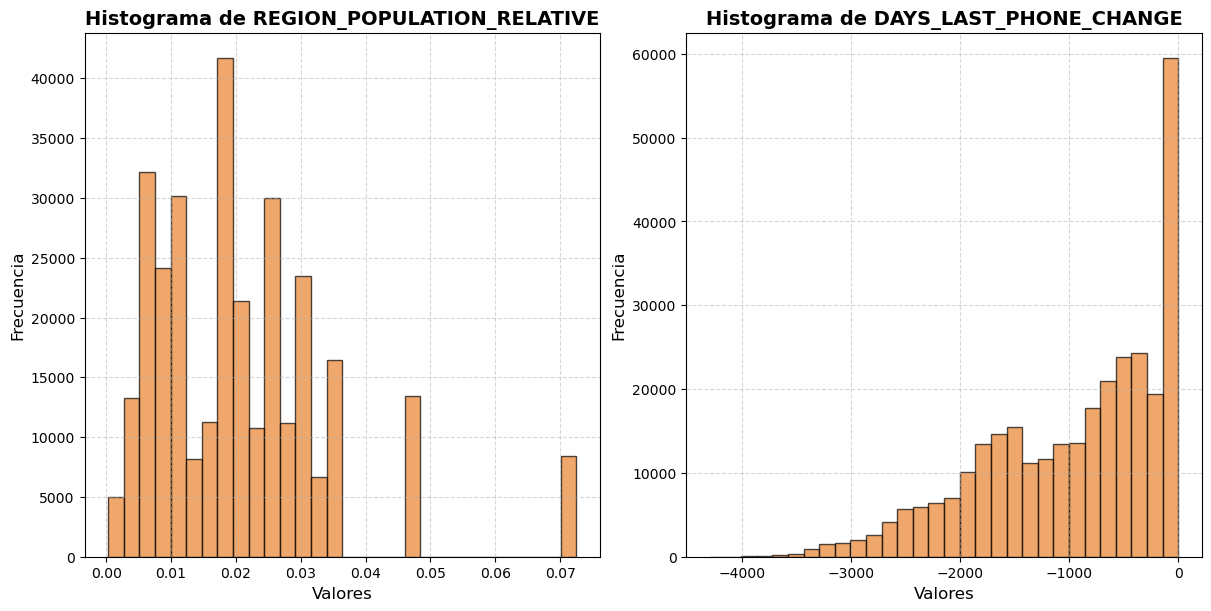

In [27]:
# Variables: REGION_POPULATION_RELATIVE y DAYS_LAST_PHONE_CHANGE
variables = ["REGION_POPULATION_RELATIVE", "DAYS_LAST_PHONE_CHANGE"]

# Crear figura y ejes (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Iterar sobre cada variable y su respectivo eje
for ax, var in zip(axes, variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"Histograma de {var}", fontsize=14, fontweight="bold")  # Título del gráfico
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()

In [16]:
data[variables].describe()

,REGION_POPULATION_RELATIVE,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307510.000000
mean,0.020868,-962.858788
std,0.013831,826.808487
min,0.000290,-4292.000000
25%,0.010006,-1570.000000
50%,0.018850,-757.000000
75%,0.028663,-274.000000
max,0.072508,0.000000


#### Información sobre la solicitud de crédito

En éste apartado se destaca información relacionada con la información del cliente al momento de la solicitud del crédito.

En primera instancia es posible evidenciar que las variables de fechas tienen un formato inusual, por lo cual la explicación que se puede realizar con la variable `DAYS_BIRTH` es la siguiente:

**Paso 1:** Se toma un valor correspondiente a la distribución de la variable, por ejemplo **-20.000**.
**Paso 2:** El valor anterior se divide por **365**, teniendo en cuenta estamos hablando términos de la edad del cliente.
**Paso 3:** Al valor anterior se le toma el valor absoluto, en este caso da un aproximado a 54 años de edad, este valor relaciona la edad del cliente al momento de solicitar el crédito.

Por tal motivo, en la variable `DAYS_BIRTH`, menores valores indican clientes de mayor edad que solicitarion un crédito. Las demás variables no hallo relación de como realizar la transformación de los datos, pero la analogía es la misma, a menor número en la variable `DAYS_REGISTRATION` indica que el cliente cambio con mayor tiempo de antelación el registro, finalmente un menor número de `DAYS_ID_PUBLISH` indica que el cliente actualizó su identificación personal mucho tiempo antes de la solicitud del crédito.

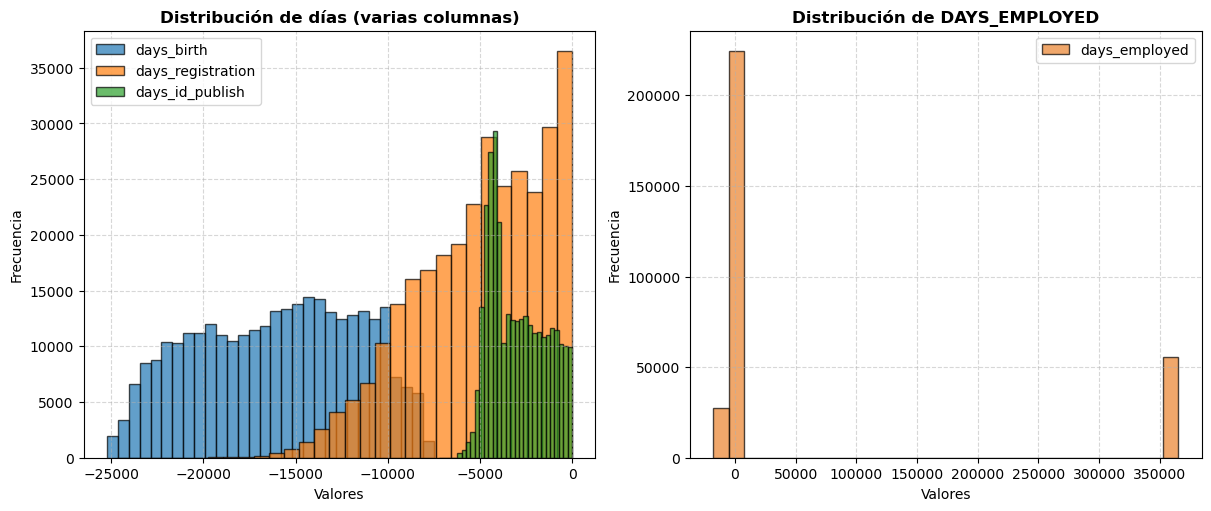

In [47]:
# Crear figura y dos axes en una fila, dos columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# Gráfico de la izquierda: Múltiples variables
days_var = ['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
for var in days_var:
    axes[0].hist(data[var], bins=30, alpha=0.7, edgecolor="black", label=var.lower())
axes[0].set_title("Distribución de días (varias columnas)", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Valores", fontsize=10)
axes[0].set_ylabel("Frecuencia", fontsize=10)
axes[0].grid(True, linestyle="--", alpha=0.5)
axes[0].legend()

# Gráfico de la derecha: Variable específica
axes[1].hist(data['DAYS_EMPLOYED'], bins=30, color="#EA822D", alpha=0.7, edgecolor="black", label='days_employed')
axes[1].set_title("Distribución de DAYS_EMPLOYED", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Valores", fontsize=10)
axes[1].set_ylabel("Frecuencia", fontsize=10)
axes[1].grid(True, linestyle="--", alpha=0.5)
axes[1].legend()

# Mostrar la figura
plt.show()

In [48]:
data[days_var + ['DAYS_EMPLOYED']].describe()

,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_EMPLOYED
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,-16036.995067,-4986.120328,-2994.202373,63815.045904
std,4363.988632,3522.886321,1509.450419,141275.766519
min,-25229.000000,-24672.000000,-7197.000000,-17912.000000
25%,-19682.000000,-7479.500000,-4299.000000,-2760.000000
50%,-15750.000000,-4504.000000,-3254.000000,-1213.000000
75%,-12413.000000,-2010.000000,-1720.000000,-289.000000
max,-7489.000000,0.000000,0.000000,365243.000000


* Para la variable `AMT_CREDIT` es posible evidenciar que el **50%** de los montos aprovados tuvieron un valor menor o igual a **\$513.531** unidades monetarias, de igual forma se evidencian créditos aprovados con un monto equivalente a **\$4.050.000** unidades monetarias.

* En el caso de `AMT_ANNUITY`, es posible evidenciar que el monto aprovado en solicitudes previos alcanzó a ser a lo sumo **\$34.596** unidades monetarias para el **50%** de los clientes.

* Finalmente, `AMT_GOODS_PRICE` indica que para el **50%** de los clientes el precio del bien que se solicitó no fue mayor a **\$450.000** unidades monetarias, manteniendo un segmento de clientes que piden montos superiores a este valor e incluso hasta **\$4.050.000** unidades monetarias.

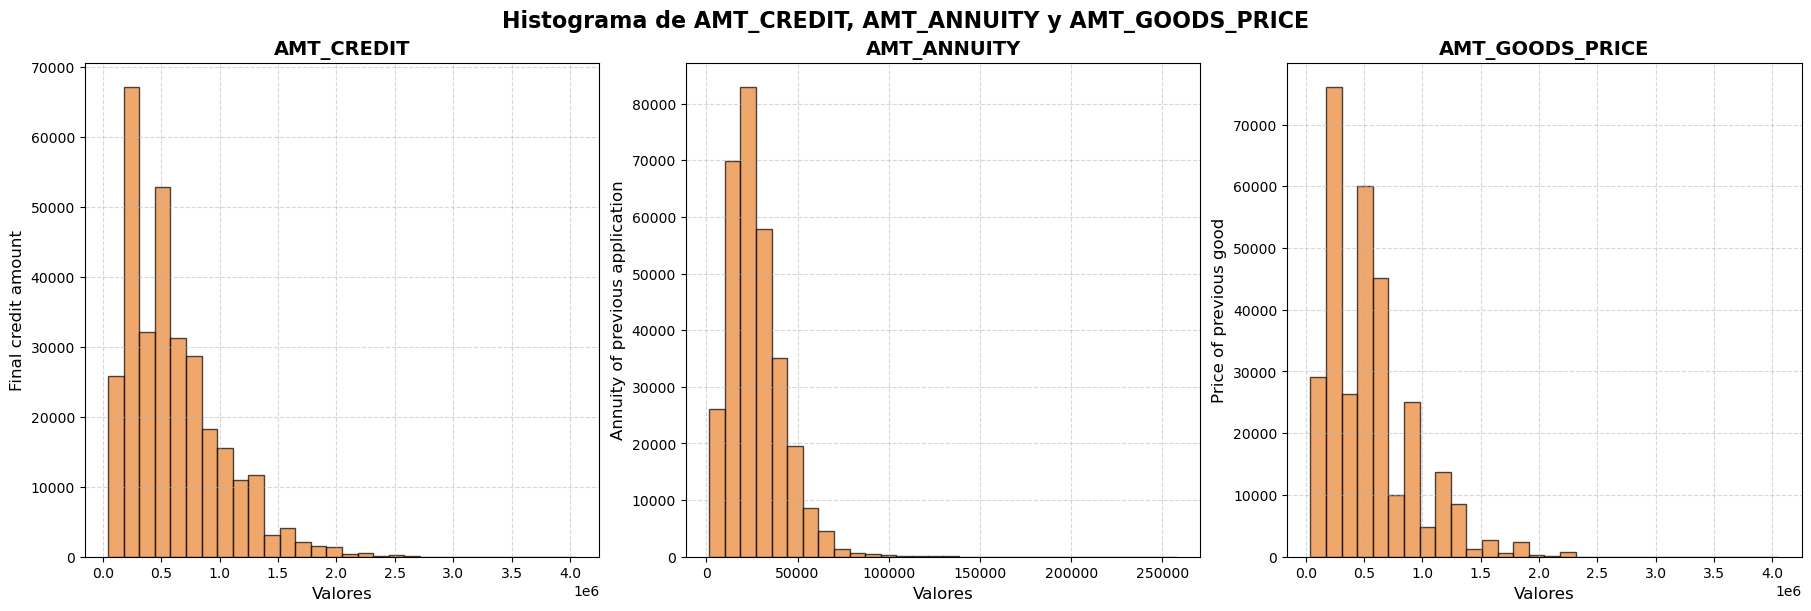

In [49]:
amt_variables = [
    "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"
]

# Crear la figura y los ejes (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Lista de etiquetas personalizadas para cada gráfico
y_labels = [
    "Final credit amount",  # Para AMT_CREDIT
    "Annuity of previous application",  # Para AMT_ANNUITY
    "Price of previous good"  # Para AMT_GOODS_PRICE
]

# Iterar sobre cada variable, su respectivo eje y la etiqueta personalizada
for ax, var, y_label in zip(axes, amt_variables, y_labels):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")  # Título con el nombre de la variable
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel(y_label, fontsize=12)  # Etiqueta eje Y personalizada
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Título general para el grupo de variables
fig.suptitle("Histograma de AMT_CREDIT, AMT_ANNUITY y AMT_GOODS_PRICE", fontsize=16, fontweight="bold")

# Mostrar la figura
plt.show()

In [50]:
data[amt_variables].describe()

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,3.075110e+05,307499.000000,3.072330e+05
mean,5.990260e+05,27108.573909,5.383962e+05
std,4.024908e+05,14493.737315,3.694465e+05
min,4.500000e+04,1615.500000,4.050000e+04
25%,2.700000e+05,16524.000000,2.385000e+05
50%,5.135310e+05,24903.000000,4.500000e+05
75%,8.086500e+05,34596.000000,6.795000e+05
max,4.050000e+06,258025.500000,4.050000e+06


El diccionario de datos no es claro con la información que representan los datos en estas variables, por lo cual no puedo decir mucho sobre estas.

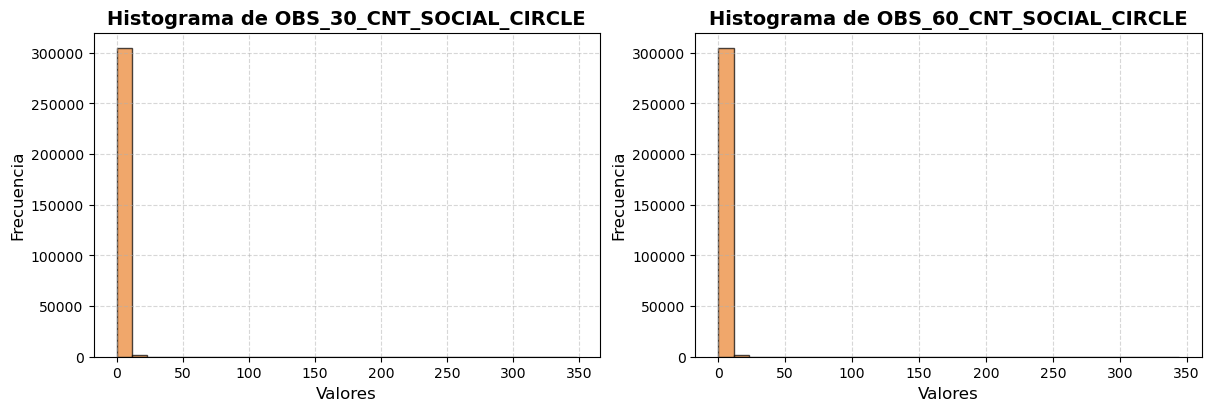

In [51]:
# Lista de variables
social_circle_variables = ["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE"]

# Crear figura y ejes (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

# Iterar sobre cada variable y su respectivo eje
for ax, var in zip(axes, social_circle_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"Histograma de {var}", fontsize=14, fontweight="bold")  # Título del gráfico
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()


In [52]:
data[social_circle_variables].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000
mean,1.422245,1.405292
std,2.400989,2.379803
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,2.000000
max,348.000000,344.000000


Las variables `AMT_REQ_CREDIT_BUREAU_MON` y `AMT_REQ_CREDIT_BUREAU_YEAR` no representan relevancia estádistica, la información en los quartiles no genera información que pueda ser usada para implementar variabilidad en el modelado.

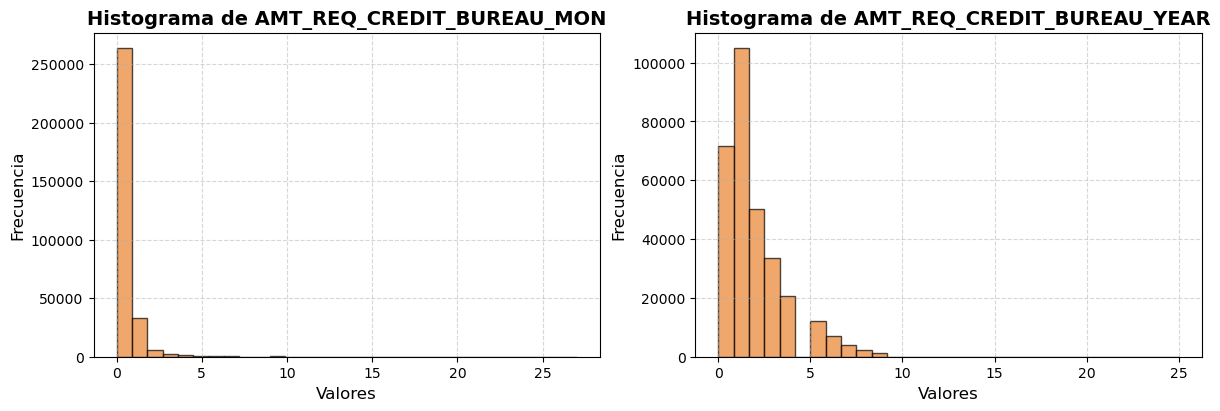

In [29]:
# Lista de variables
credit_bureau_variables = ["AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_YEAR"]

# Crear figura y ejes (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

# Iterar sobre cada variable y su respectivo eje
for ax, var in zip(axes, credit_bureau_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"Histograma de {var}", fontsize=14, fontweight="bold")  # Título del gráfico
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()


In [54]:
data[credit_bureau_variables].describe()

,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000
mean,0.267395,1.899974
std,0.916002,1.869295
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,3.000000
max,27.000000,25.000000


Finalmente, la mitad de las solicitudes de crédito suelen tener una concentración entre las **10 am** y las **2 pm**, el comportamiento de la distribución refleja similaridad a un comportamiento normal por parte de los clientes. Algo a destacar es la presencia de solicitudes de crédito en horas como las **11 pm** o durante la **media noche**.

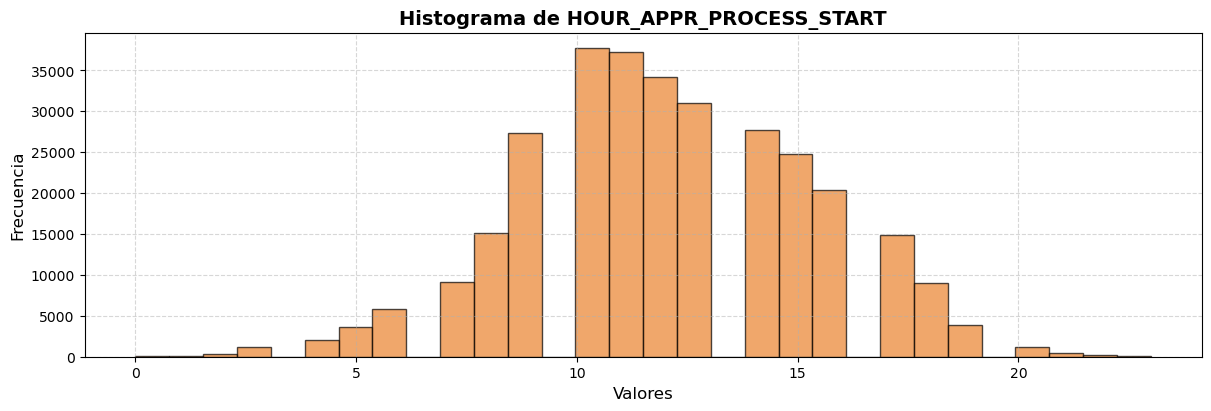

In [55]:
# Variables a graficar
variables = [
    "HOUR_APPR_PROCESS_START"
]

# Crear figura y ejes (1 fila, 1 columna)
fig, ax = plt.subplots(1, 1, figsize=(12, 4), constrained_layout=True)

# Como solo hay una variable, trabajamos directamente con 'ax' en lugar de iterar
ax.hist(data[variables[0]], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
ax.set_title(f"Histograma de {variables[0]}", fontsize=14, fontweight="bold")  # Título del gráfico
ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()

In [56]:
data[variables].describe()

,HOUR_APPR_PROCESS_START
count,307511.000000
mean,12.063419
std,3.265832
min,0.000000
25%,10.000000
50%,12.000000
75%,14.000000
max,23.000000


## Análisis bivariado

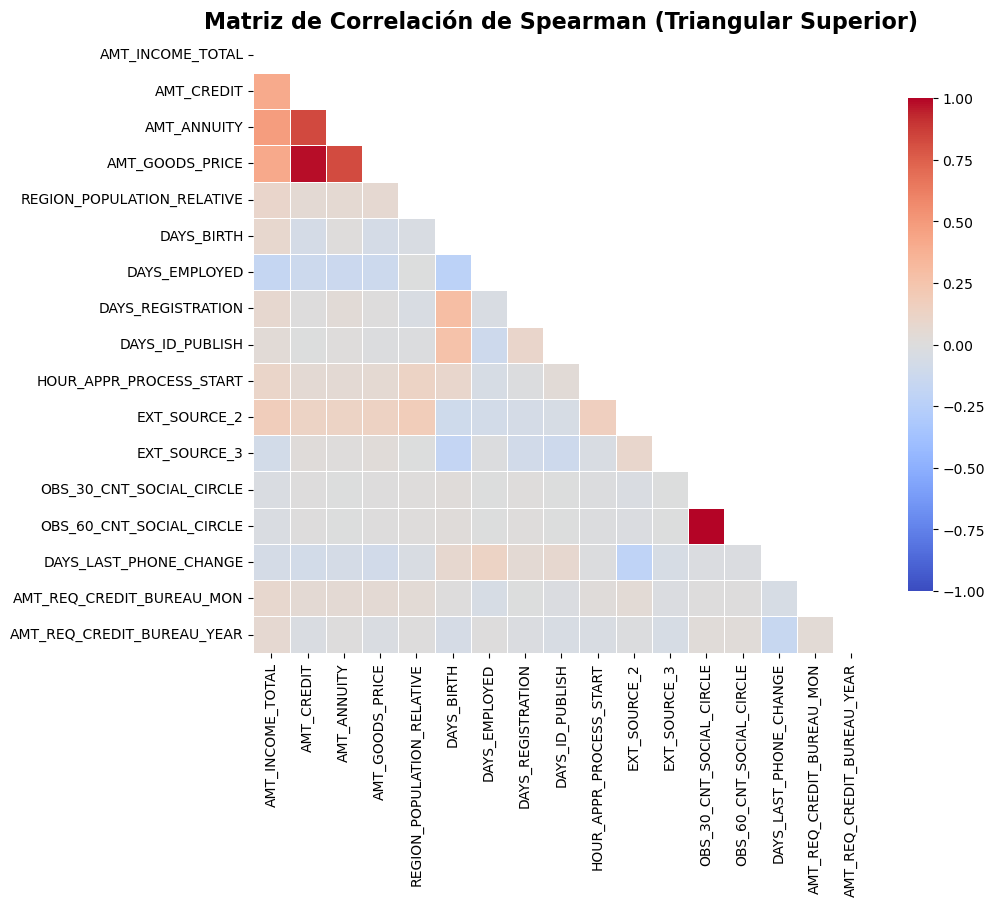

In [33]:
# Calcular la matriz de correlación de Spearman
corr_spearman = data[numeric_cols].corr(method='spearman')

# Crear una máscara para mostrar solo la parte triangular superior
mask = np.triu(np.ones_like(corr_spearman, dtype=bool))

# Crear el gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=False, cmap="coolwarm", mask=mask, 
            cbar_kws={"shrink": .8}, square=True, linewidths=0.5,
            vmin=-1, vmax=1)

# Mostrar el gráfico
plt.title("Matriz de Correlación de Spearman (Triangular Superior)", fontsize=16, fontweight="bold")
plt.show()

Podemos evidenciar principalmente cuatro (4) correlaciones fuertes:

* `AMT_GOODS_PRICE` - `AMT_CREDIT`: Esta correlación explica que a mayor sea el precio del bien que el cliente cotiza, mayor es el monto aprobado por la entidad crediticia.

* `AMT_ANNUITY` - `AMT_CREDIT`: Esta correlación indica que a mayor monto haya sido aprovado previamente al cliente, mayor monto se le aprobará al cliente en un futuro (monto aprovado al momento de la solicitud actual).

* `AMT_GOODS_PRICE` - `AMT_ANNUITY`: Esta correlación indica que a mayor fue el monto crediticio aprovado previamente, mayor es el monto del bien cotizado para la solicitud de crétido actual. En otras palabras, los clientes se piden cosas mas caras que en su última aprovación.

Mis variables sugeridas:

* REGION_POPULATION_RELATIVE
* EXT_SOURCE_2
* HOUR_APPR_PROCESS_START
* AMT_GOODS_PRICE
* AMT_CREDIT
* DAYS_BIRTH
* AMT_ANNUITY